<img alt="BannerDataScience" width="100%" src="https://raw.githubusercontent.com/rodrigomariamorgao/portfolio_data_science/master/banner.png">

---

# Analisando a Violência no Rio de Janeiro

Diariamente vemos notícias da violência que acomete nossas cidades, e, por causa da sua importância para o turismo no Brasil, o Rio de Janeiro é uma estado que é visado tanto no nível de assaltos, sequestros, tráfico de drogas e outros delitos existentes pelo mundo afora. Aproveitando que possuímos [dados abertos](http://www.ispdados.rj.gov.br/estatistica.html) sobre o estado, iremos importar um *dataset* e analisar alguns *insights* que podemos obter a respeito do nível de violência existente na estado do Rio de Janeiro.

O Instituto de Segurança Pública (ISP) do governo do Rio de Janeiro possui um [dashboard](http://www.ispvisualizacao.rj.gov.br/index.html) interativo, onde podemos avaliar tipos de crime, áreas, entre outros parâmetros, ao longo dos anos.

## Obtenção dos Dados


Esses dados foram estraídos do [site](http://www.ispdados.rj.gov.br/estatistica.html) do Instituto de Segurança Pública do Estado do Rio de Janeiro, que fornece devido a política de dados abertos nos órgãos públicos.

### Importando os dados

In [0]:
#importar os pacotes necessários
import pandas as pd

In [34]:
# local de hospedagem do arquivo
DATA_PATH = "https://raw.githubusercontent.com/rodrigomariamorgao/portfolio_data_science/master/datasets/violencia_rio.csv"

#importar o arquivo violencia_rio.csv para um dataframe
df = pd.read_csv(DATA_PATH)

# listar as 5 primeiras entradas do dataset
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


## Análise Inicial dos Dados

Esta etapa tem por objetivo demostrar a situação inicial dos dados e permitir um entendimento de como os mesmos estão estruturados.

###**Dicionário das variáveis**

* `vano` - ano da ocorrência do ato de violência
* `mes` - mês da ocorrência do ato de violência
* `hom_doloso` - quantidade de homícidios dolosos
* `lesao_corp_morte` - quantidade de lesões corporais seguidas de morte
* `latrocinio` - quantidade de latrocínios
* `hom_por_interv_policial` - quantidade de homícidios por intervenção policial
* `tentat_hom` - quantidade de tentativas de homicídios
* `lesao_corp_dolosa` - quantidade de lesões corporais dolosas
* `estupro` - quantidade de estupros
* `hom_culposo` - quantidade de homicídios culposos
* `lesao_corp_culposa` - quantidade de lesões corporais culposas
* `roubo_comercio` - quantidade de roubos em comércios
* `roubo_residencia` - quantidade de roubos em residências
* `roubo_veiculo` - quantidade de roubos de veículos
* `roubo_carga` - quantidade de roubos de carga
* `roubo_transeunte` - quantidade de roubos a transeuntes
* `roubo_em_coletivo` - quantidade de roubos coletivos
* `roubo_banco` - quantidade de roubos a bancos
* `roubo_cx_eletronico` - quantidade de roubos a caixas eletrônicos
* `roubo_celular` - quantidade de roubos de aparelhos celulares
* `roubo_conducao_saque` - quantidade de roubos em condução para saque de dinheiro em espécie
* `roubo_apos_saque` - quantidade de roubos após o saque de dinheiro em espécie
* `roubo_bicicleta` - quantidade de roubos de bicicletas
* `outros_roubos` - quantidade de outros tipos de roubos
* `total_roubos` - quantidade de total de roubos
* `furto_veiculos` - quantidade de furtos de veículos
* `furto_transeunte` - quantidade de furtos a transeuntes
* `furto_coletivo` - quantidade de furtos coletivos
* `furto_celular` - quantidade de furtos de aparelhos celulares
* `furto_bicicleta` - quantidade de furtos de bicicletas
* `outros_furtos` - quantidade de outro tipos de furtos
* `total_furtos` - quantidade total de furtos
* `sequestro` - quantidade de sequestros
* `extorsao` - quantidade de extorsões
* `sequestro_relampago` - quantidade de sequestros relâmpago
* `estelionato` - quantidade de estelionatos
* `apreensao_drogas` - quantidade de apreensão de drogas
* `posse_drogas` - quantidade de posse de drogas
* `trafico_drogas` - quantidade de tráfico de drogas
* `apreensao_drogas_sem_autor` - quantidade de apreensões de drogas sem autor
* `recuperacao_veiculos` - quantidade de recuperação de veículos
* `apf` - quantidade de autos de prisão em flagrante
* `aaapai`  - quantidade de autos de apreensão de adolescente por ato infracional
* `cmp` - parâmetro desconhecido
* `cmba` - parâmetro desconhecido
* `ameaca` - quantidade de ameaças
* `pessoas_desaparecidas` - quantidade de pessoas desaparecidas
* `encontro_cadaver` - quantidade de encontro de cadáveres
* `encontro_ossada` - quantidade de encontro de ossadas
* `pol_militares_mortos_serv` - quantidade de policiais militares mortos em serviço
* `pol_civis_mortos_serv` - quantidade de policiais civis mortos em serviço
* `indicador_letalidade` - indicador de letalidade
* `indicador_roubo_rua` - indicador de roubos de rua
* `indicador_roubo_veic` - indicador de roubos de veículos
* `registro_ocorrencias` - registros de ocorrências
* `fase` - parâmetro desconhecido



Alguns parâmetros não puderam ser traduzidos devido a falta de informações no site onde o *dataset* encontra-se disponível.

O *dataset* possui as seguintes quantidades de variáveis e entradas:

In [21]:
# identificar o volume de dados do DataFrame
print("Variáveis:\t {}\n".format(df.shape[1]))
print("Entradas:\t {}".format(df.shape[0]))

Variáveis:	 56

Entradas:	 344


Os tipos das variáveis são os seguintes:

In [22]:
# verificar os tipos de entradas do dataset
display(df.dtypes)

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Veremos a seguir a porcentagem de valores ausentes das colunas:

In [41]:
# verificar a porcentagem dos dados faltantes, ordenados pela ordem decrescente
nullseries = (df.isnull().sum() / df.shape[0]).sort_values(ascending=False,)
print(nullseries[nullseries > 0])

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

Podemos analisar que 80% dos atos violentos contendo bicicletas não foram inseridos no *dataset* avaliado.

## Informações Estatísticas da Violência no Rio de Janeiro

Os dados a seguir podem ser chocantes, devido ao tipo de análise que estamos elaborando, pois envolvem vidas que foram perdidas ou machucadas nestes atos de violência.


Esse é o resumo do *dataframe* importado anteriormente.

In [24]:
# imprimir o resumo do dataframe
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

Neste resumo geral, podemos infelizmente verificar, por exemplo, que no estado do Rio de Janeiro no mínimo há 188 estupros por mês, tendo em vista que cada linha de nosso *dataset* equivale a um mês/ano correspondente.

Outro crime que choca nossa atenção tanto no noticiário e pode ser comprovado nessa análise é em relação as drogas, tanto na apreensão, como na posse e tráfico das mesmas.

A seguir iremos avaliar a média dos roubos de veículos deste *dataset*:

In [25]:
# informa a média dos roubos dos veículos
roubo_veiculos = df.roubo_veiculo.mean()
print(roubo_veiculos)

2448.6976744186045


Notamos que mensalmente são roubados em média 2448 carros no estado do Rio de Janeiro. Iremos ver a seguir a média dos furtos de veículos e a recuperação envolvendo esses crimes.

In [26]:
# informa a média dos furtos dos veículos
furto_veiculos = df.furto_veiculos.mean()
print(furto_veiculos)

1674.671511627907


In [27]:
# informa a média de recuperação dos veículos
recuperacao_veiculos = df.recuperacao_veiculos.mean()
print(recuperacao_veiculos)

1772.2383720930231


In [28]:
# porcentagem da média dos carros recuperados
recuperacao_veiculos/(roubo_veiculos+furto_veiculos) * 100

42.980346705075085

Podemos notar que a média de carros recuperados é no valor de 1772 veículos, enquanto a soma da média de furtos e roubos chega no valor de 4122 veículos. Constatamos assim que **apenas 42%** em média do total de carros estão sendo recuperados.

Outro grande problema da violência no estado do Rio de Janeiro são os homícidios dolosos (quando uma pessoa mata com intenção). Notemos os valores mínimos e máximos mensais desse tipo de violência


In [29]:
# informa o valor mínimo de homicídios dolosos
df.hom_doloso.min()

272

In [30]:
# informa o valor máximo de homicídios dolosos
df.hom_doloso.max()

831

## Visualização de Dados

Iremos realizar a análise visual de algumas colunas de nosso *dataset*, onde podemos isolar o atributo desejado e transformá-lo assim num elemento visual para rápida observação e melhor entendimento.


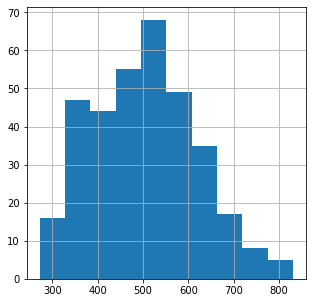

In [31]:
# plotar um histograma dos homicídios dolosos
df.hom_doloso.hist(figsize=(5,5))

Neste histograma podemos verificar que a quantidade de ocorrências de homícidios dolosos que mais se repetem no *dataset* (quase 70 entradas) é entre 500 a 550 casos por mês.

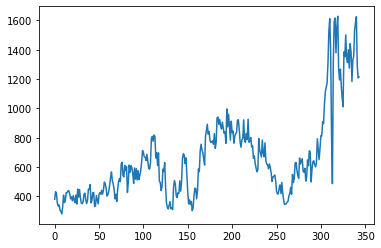

In [32]:
# plotar um gráfico de linhas dos roubos em coletivo
df.roubo_em_coletivo.plot();

De acordo com esse gráfico, podemos ver que nos últimos meses teve um aumento acentuado de roubos em coletivos no estado do Rio de Janeiro.

## Conclusão

Nesta breve análise podemos verificar os pontos a seguir:
- Os **maiores atos de violência não relatados** são envolvendo roubos e furtos de bicicletas;
- Ocorrem no mínimo **188 estupros por mês** no estado do Rio de Janeiro;
- Várias ocorrências envolvendo **drogas** são citadas no *dataset*;
- A média de recuperação de veículos **é apenas 42%** (a cada 100 veículos, apenas 42 são recuperados);
- Os homícidios dolosos que mais se repetem encontram-se na faixa de **500 a 550 casos** por mês;
- A partir de **janeiro/2016 houve um grande aumento** nos casos de roubos em coletivos no estado do Rio de Janeiro.

Infelizmente a violência encontra-se em todo lugar. Tive o privilégio de visitar por duas vezes o estado (mais precisamente a capital) e felizmente não passei por nenhum tipo de ato violento. Mas, para os moradores do estado, a política de segurança pública precisa urgentemente de planos para que esses números voltem a diminuir.

Obrigado pela leitura e me acompanhe no [LinkedIn](https://www.linkedin.com/in/rodrigomariamorgao/) e no [Medium](https://medium.com/@rodrigomariamorgao) para outros artigos e análises. Abraço!